# Import pacakges

In [1]:
from WEB import *

# Real data

### Initial value

In [2]:
PROTEIN = "6z6u"
EM_MAP = "11103"

### read data

In [3]:
web = WEB(start_radius=0, max_radius=1, gap=0.2)
data = web.read_data(
    root_map=f'./dataset/emd_{EM_MAP}.mrc', 
    root_pdb=f'./dataset/{PROTEIN}.pdb',
    atomic="CA",
    base_num_points=10, 
    max_points=1000
    )

100%|██████████| 4128/4128 [00:01<00:00, 2949.80it/s]


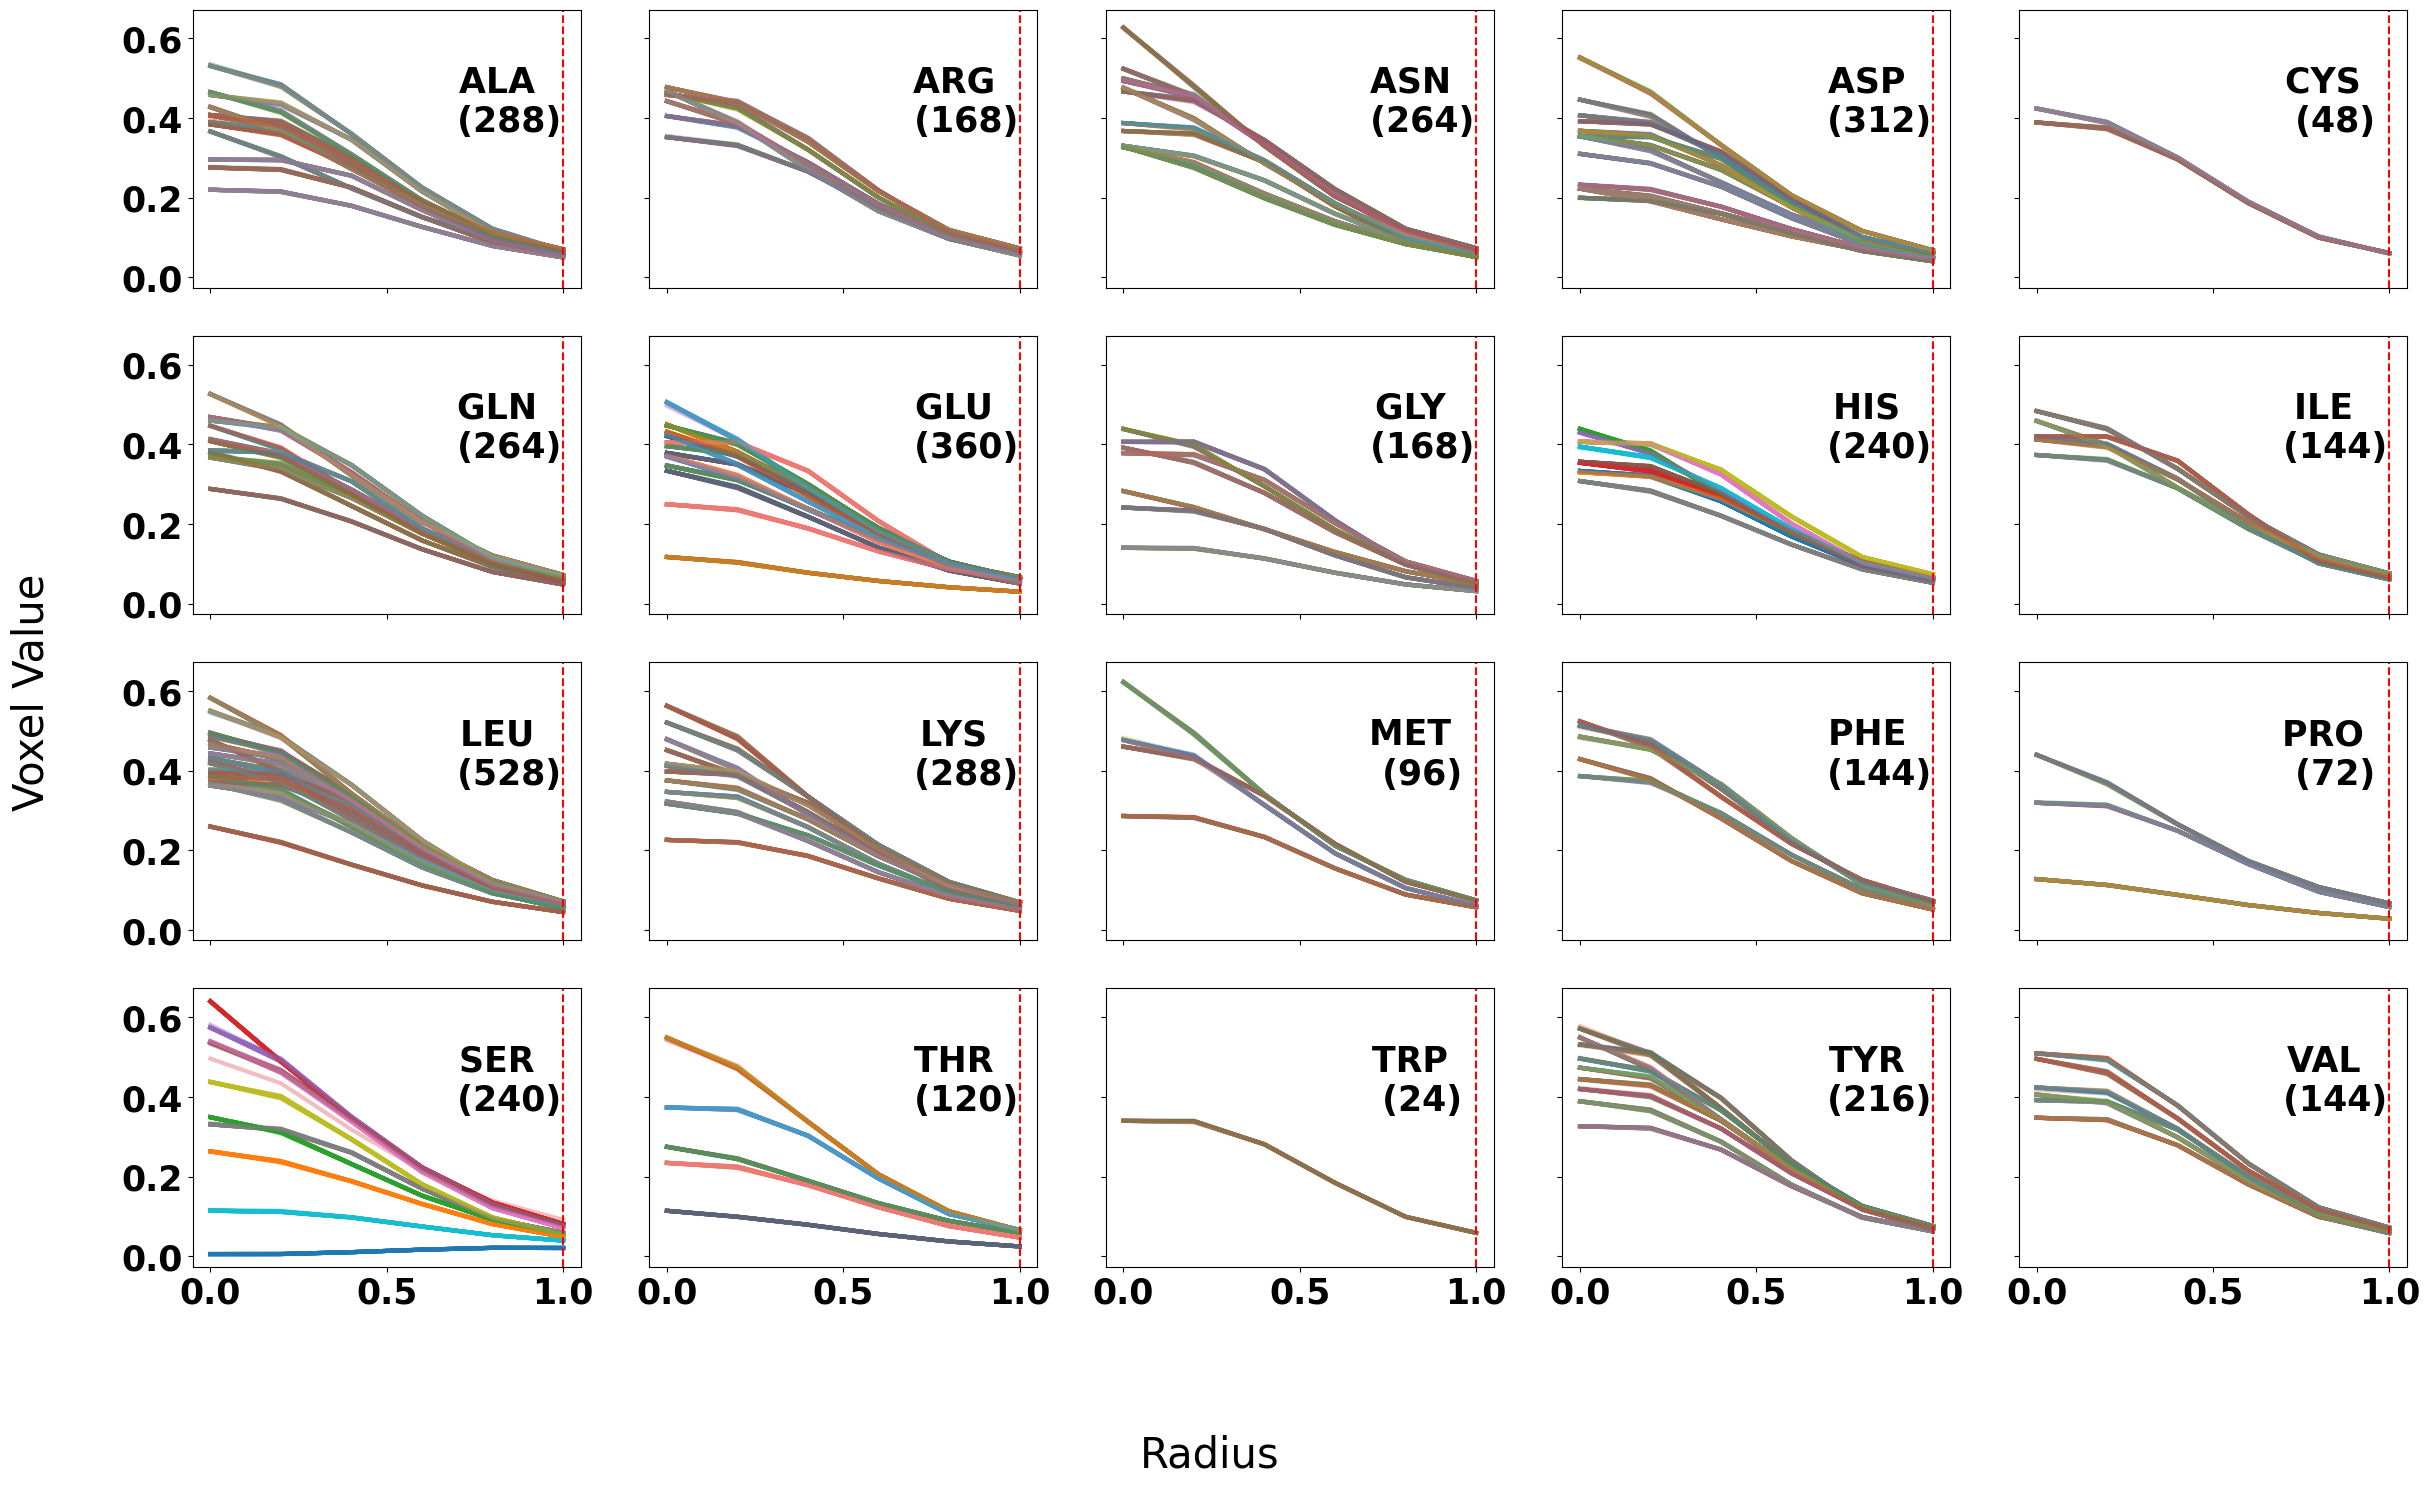

In [4]:
web.densities_plot(f"./figures/densities_plot_{PROTEIN}_{EM_MAP}")

### Fit our model

In [5]:
_ = web.paramters_initial()
betas_WEB, histories = web.WEB_iter(max_iter=20, alpha=0.1, gamma=0.1, tol=1e-5)

100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


### Plot results

<Figure size 640x480 with 0 Axes>

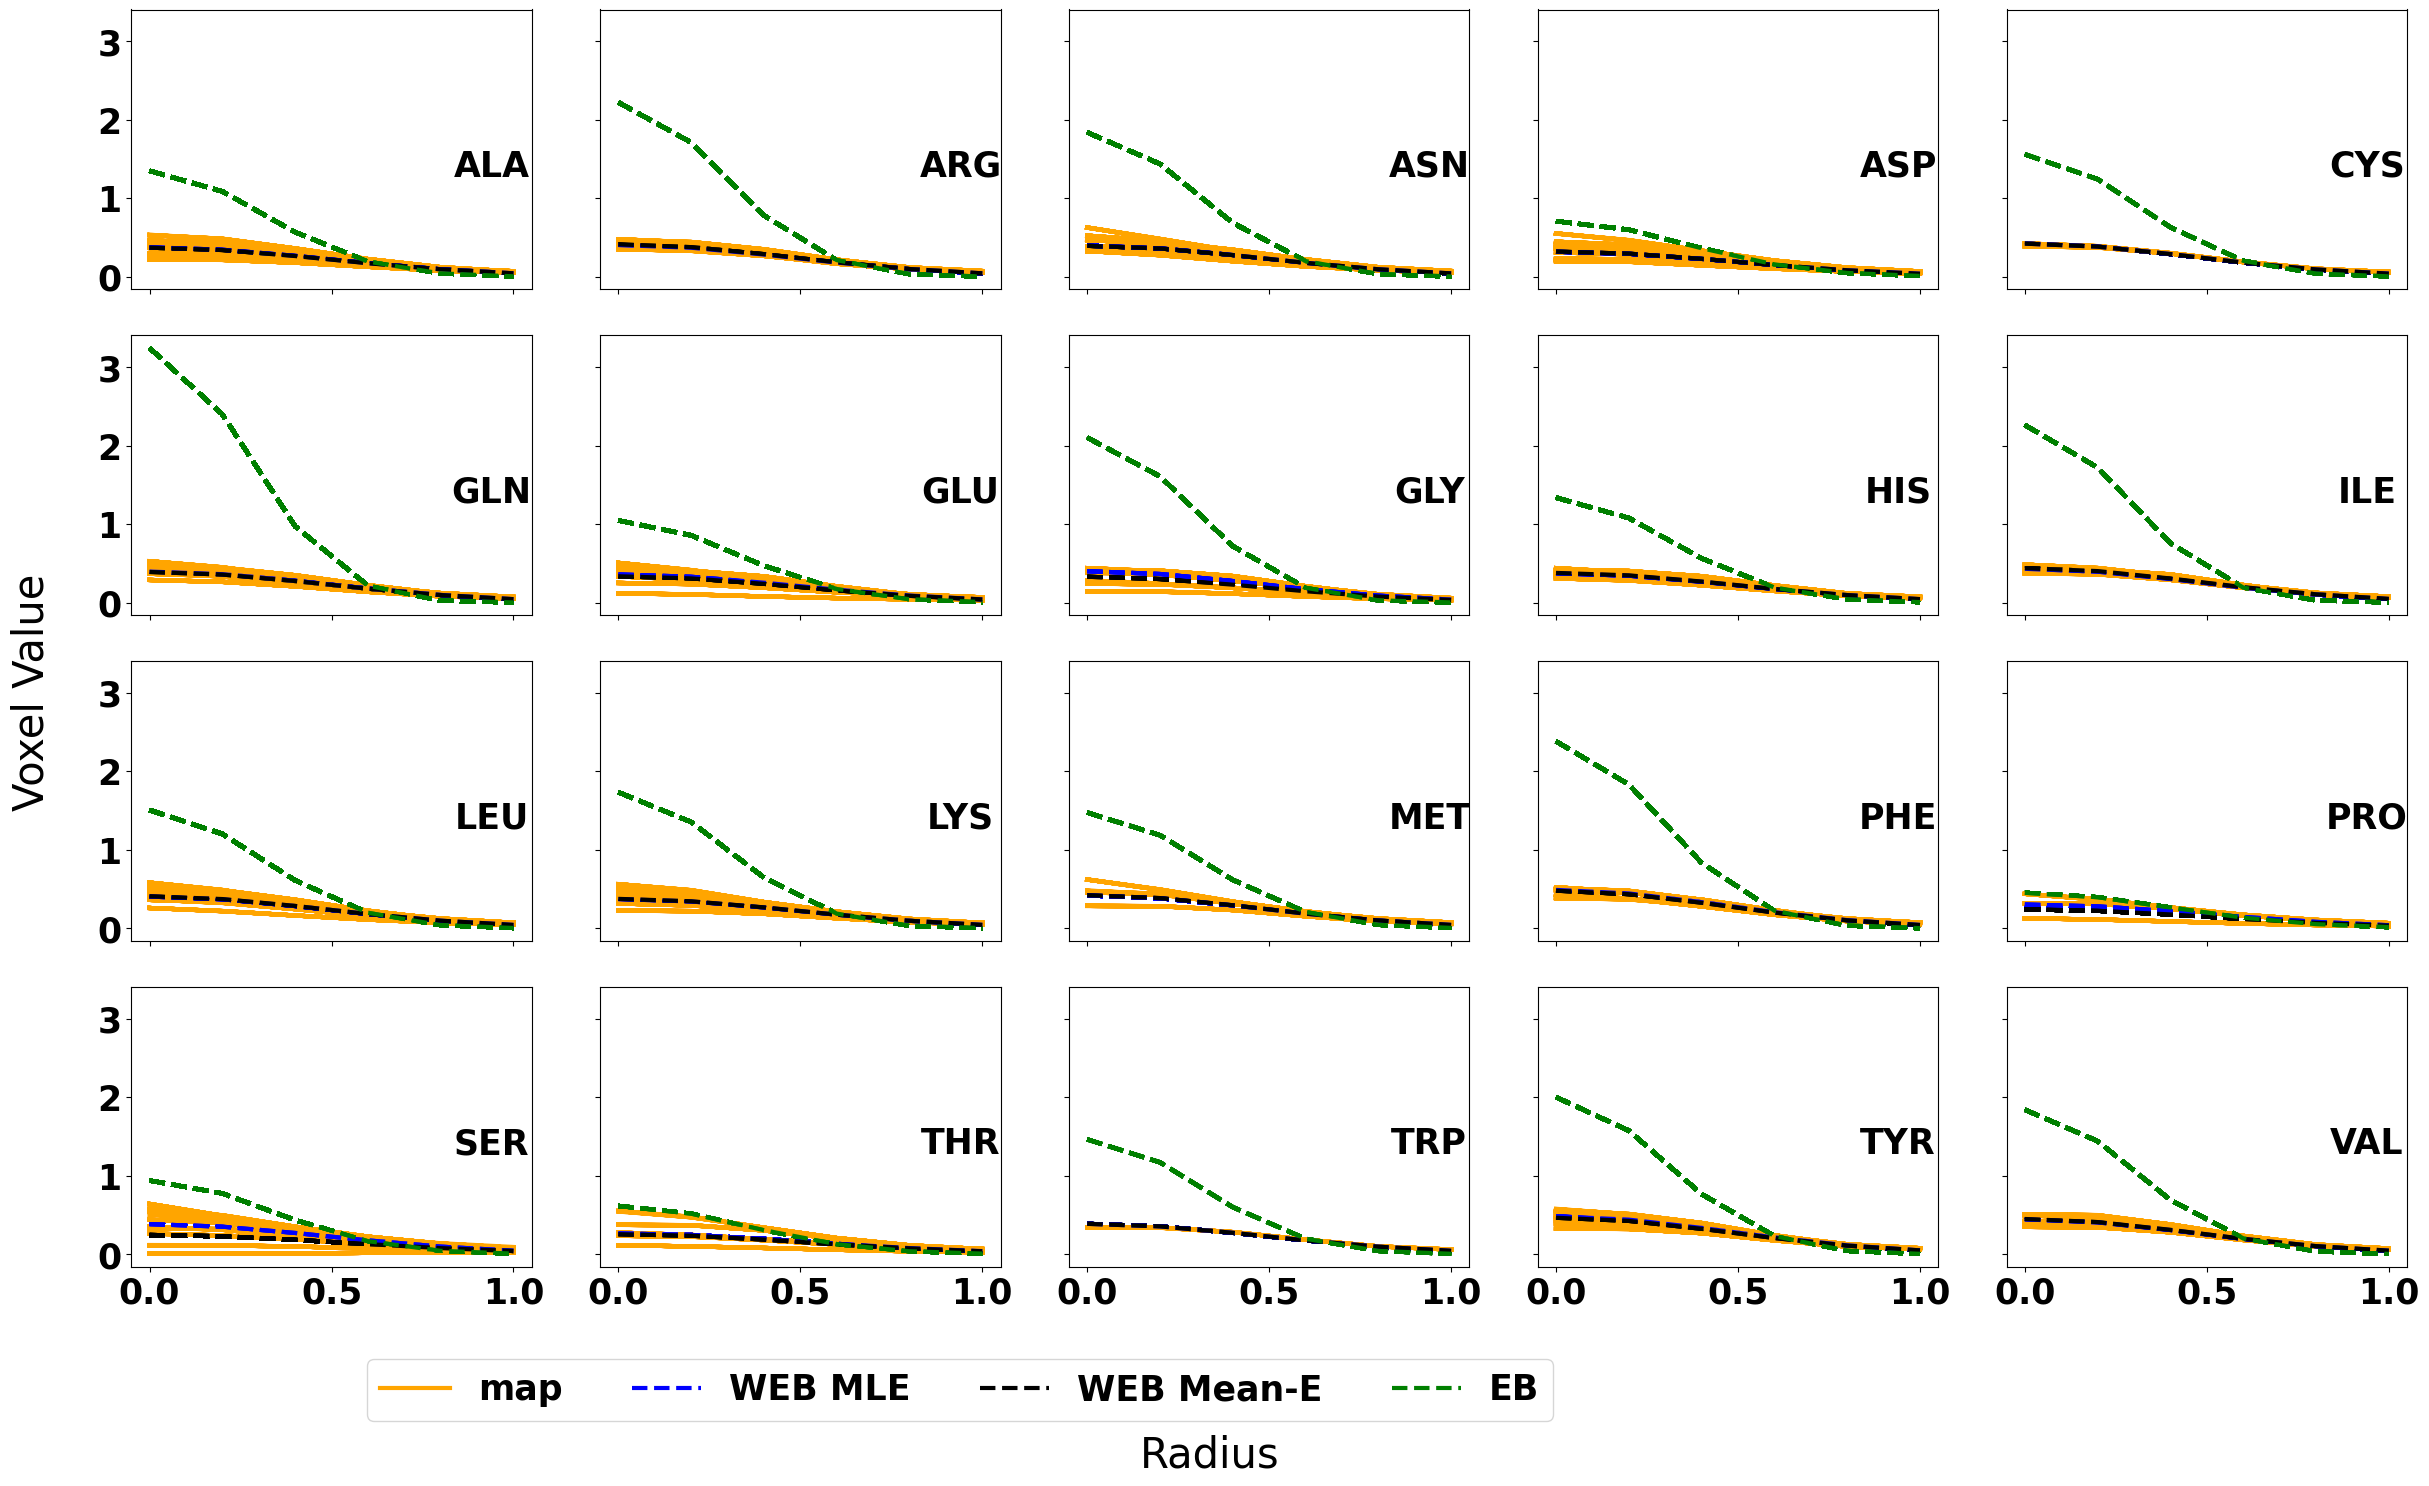

In [6]:
web.representative_densities_plot(
    root = f"./figures/densities_compared_{PROTEIN}_{EM_MAP}_EB", 
    estimators = ["WEB MLE", "WEB Mean-E", "EB"]
    )

<Figure size 640x480 with 0 Axes>

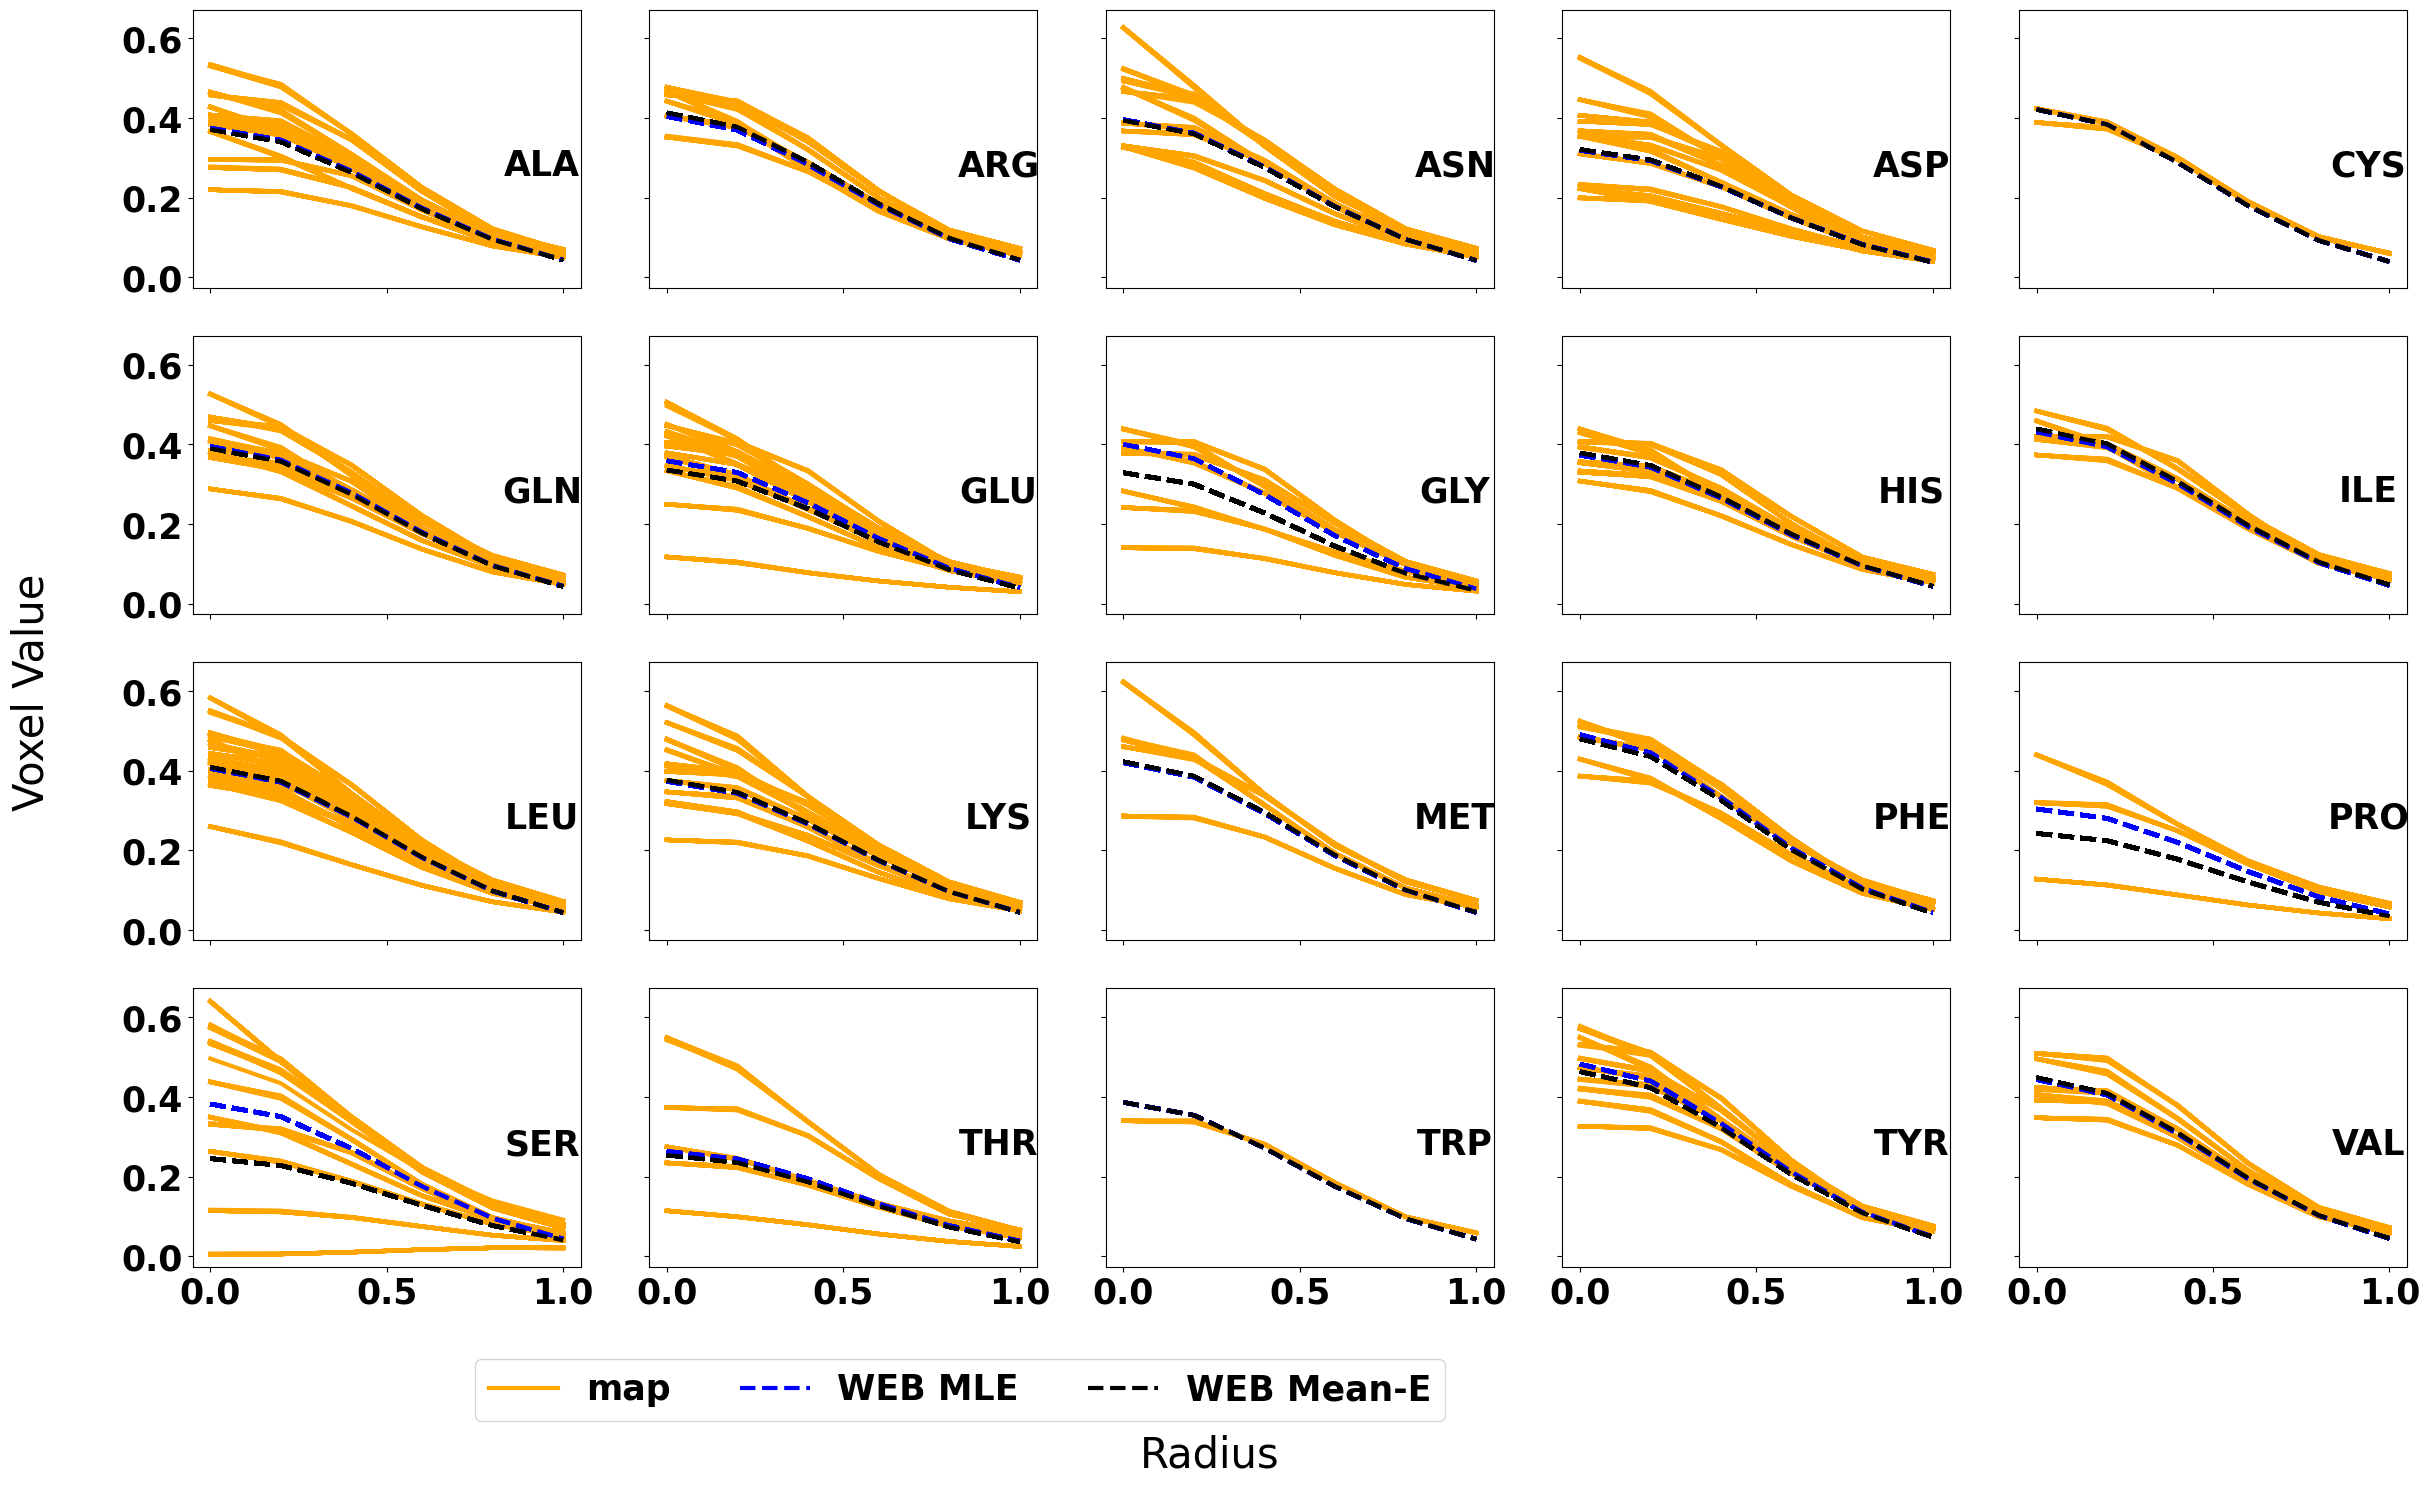

In [7]:
web.representative_densities_plot(
    root = f"./figures/densities_compared_{PROTEIN}_{EM_MAP}", 
    estimators = ["WEB MLE", "WEB Mean-E"]
    )

### Find outliers

In [8]:
outliers, statistic_distances = web.find_outliers()

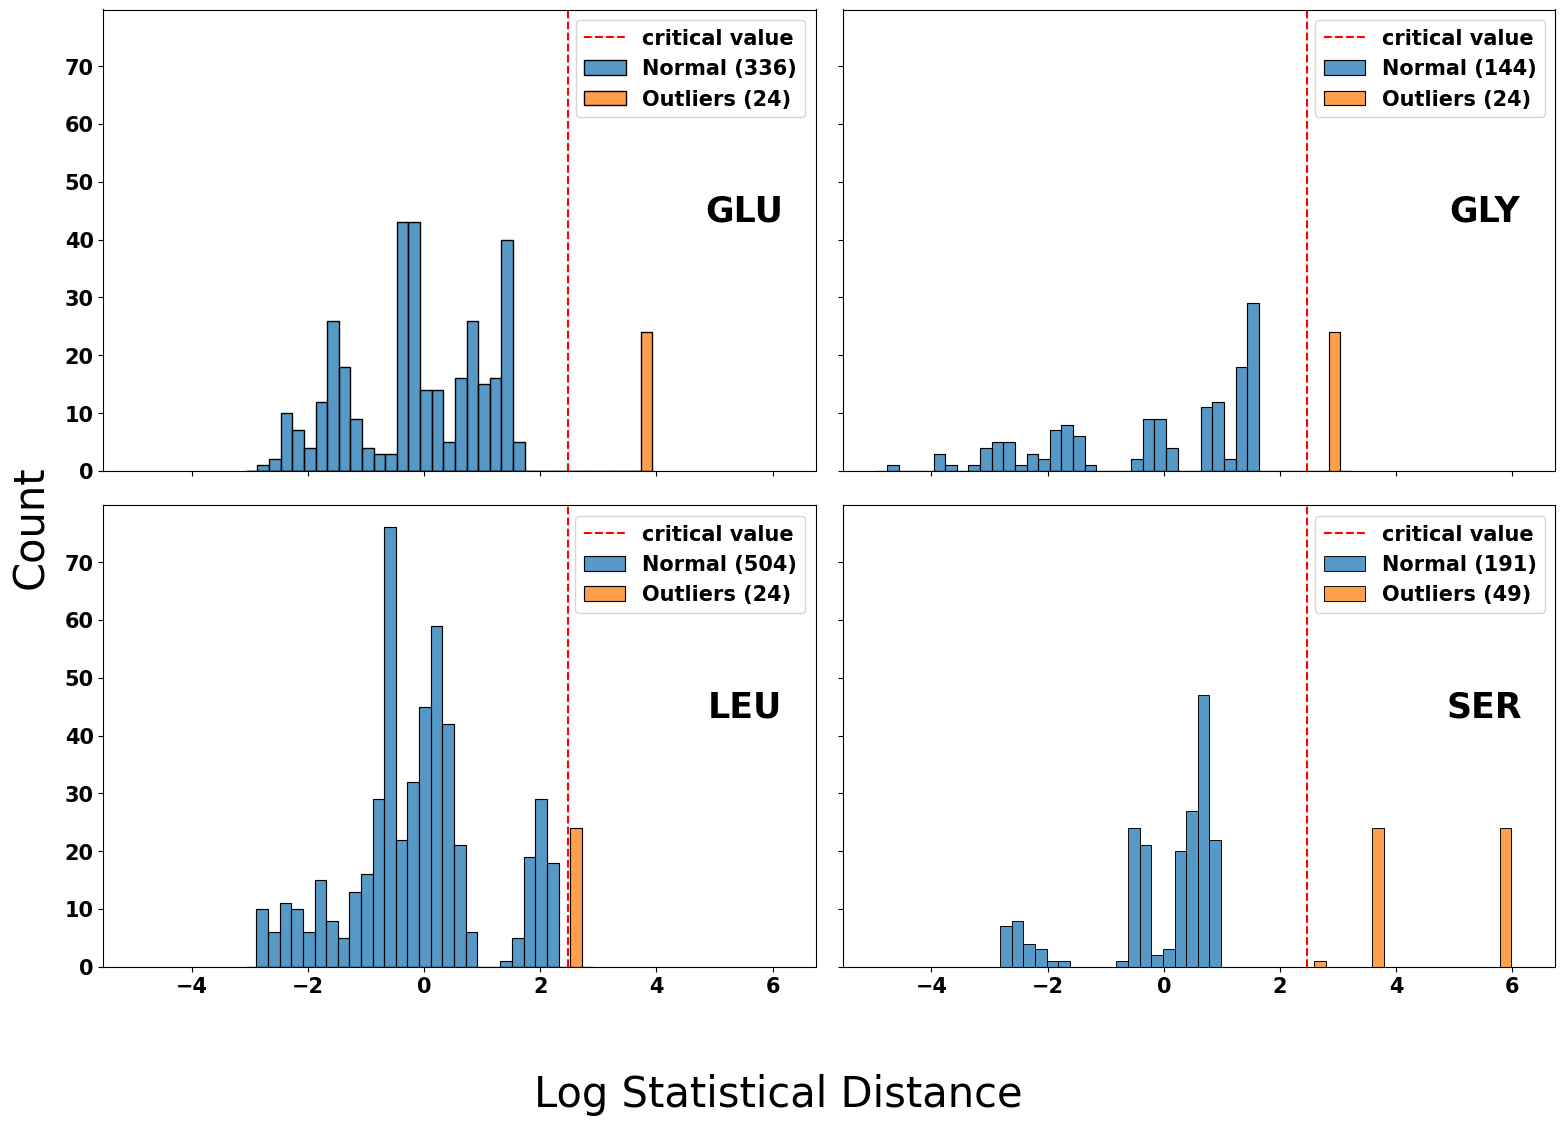

In [9]:
web.distances_hist(f"./figures/distances_hist_{PROTEIN}_{EM_MAP}")

<Figure size 640x480 with 0 Axes>

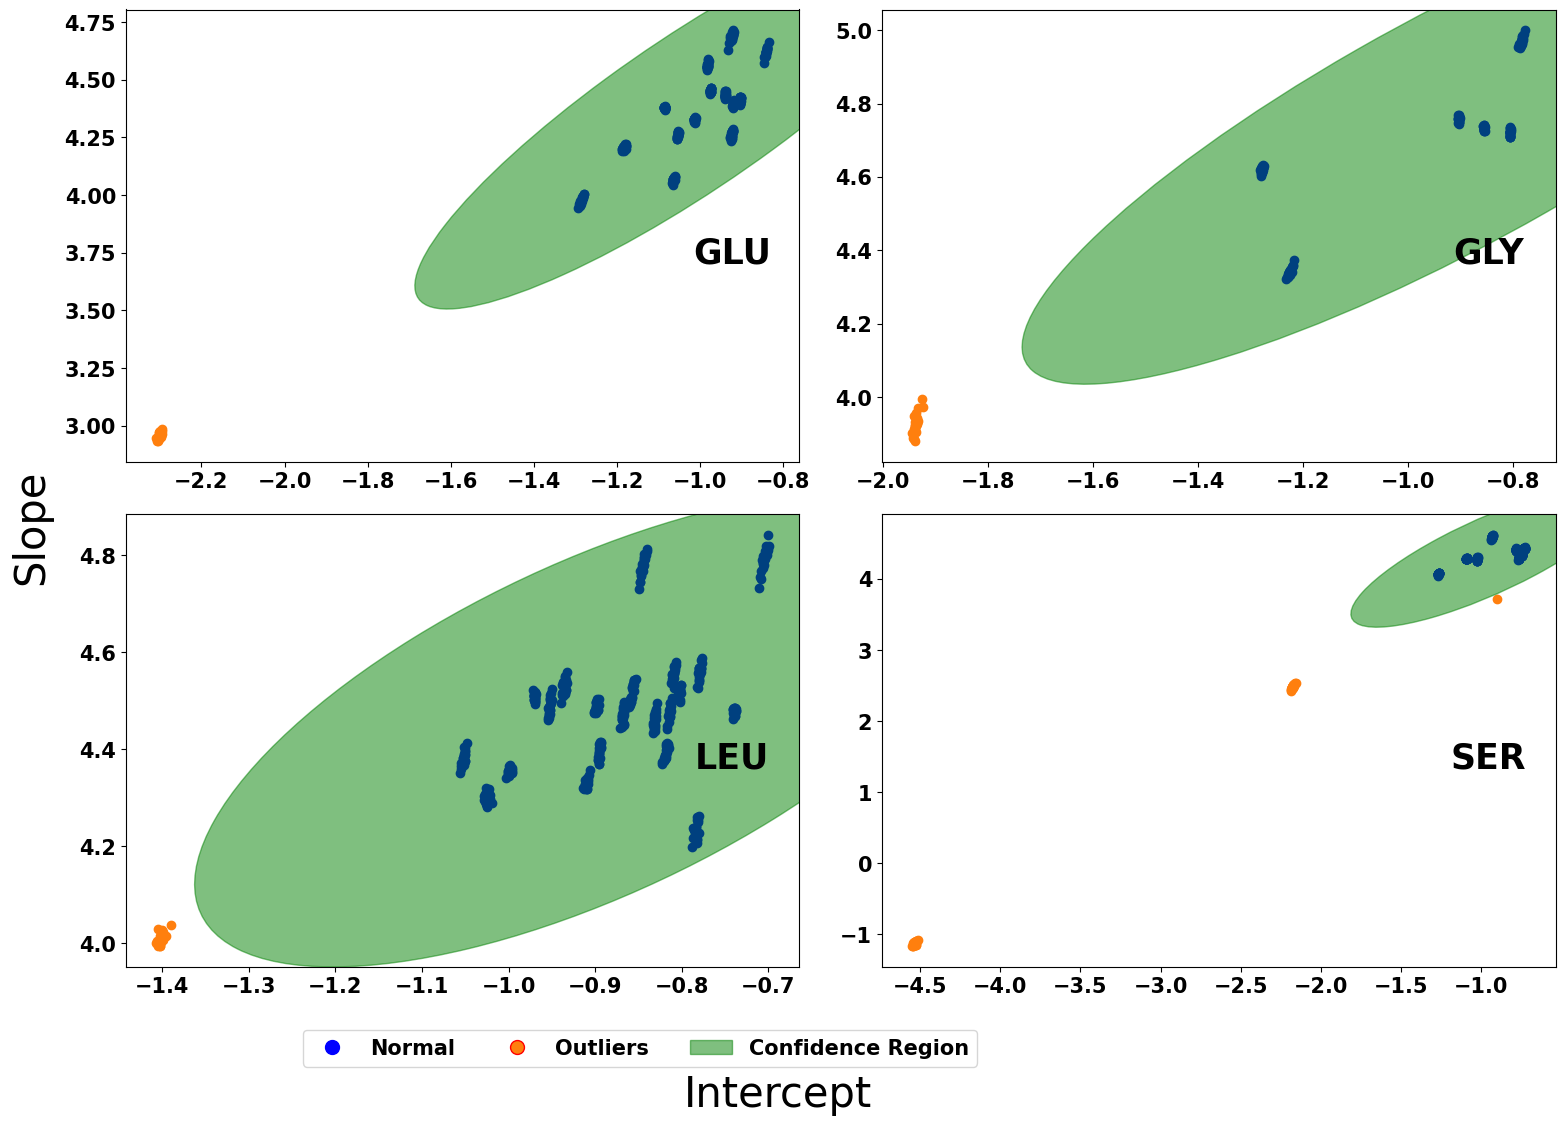

In [10]:
web.confidence_regions_plot(f"./figures/confidence_regions_plot_{PROTEIN}_{EM_MAP}")

<Figure size 640x480 with 0 Axes>

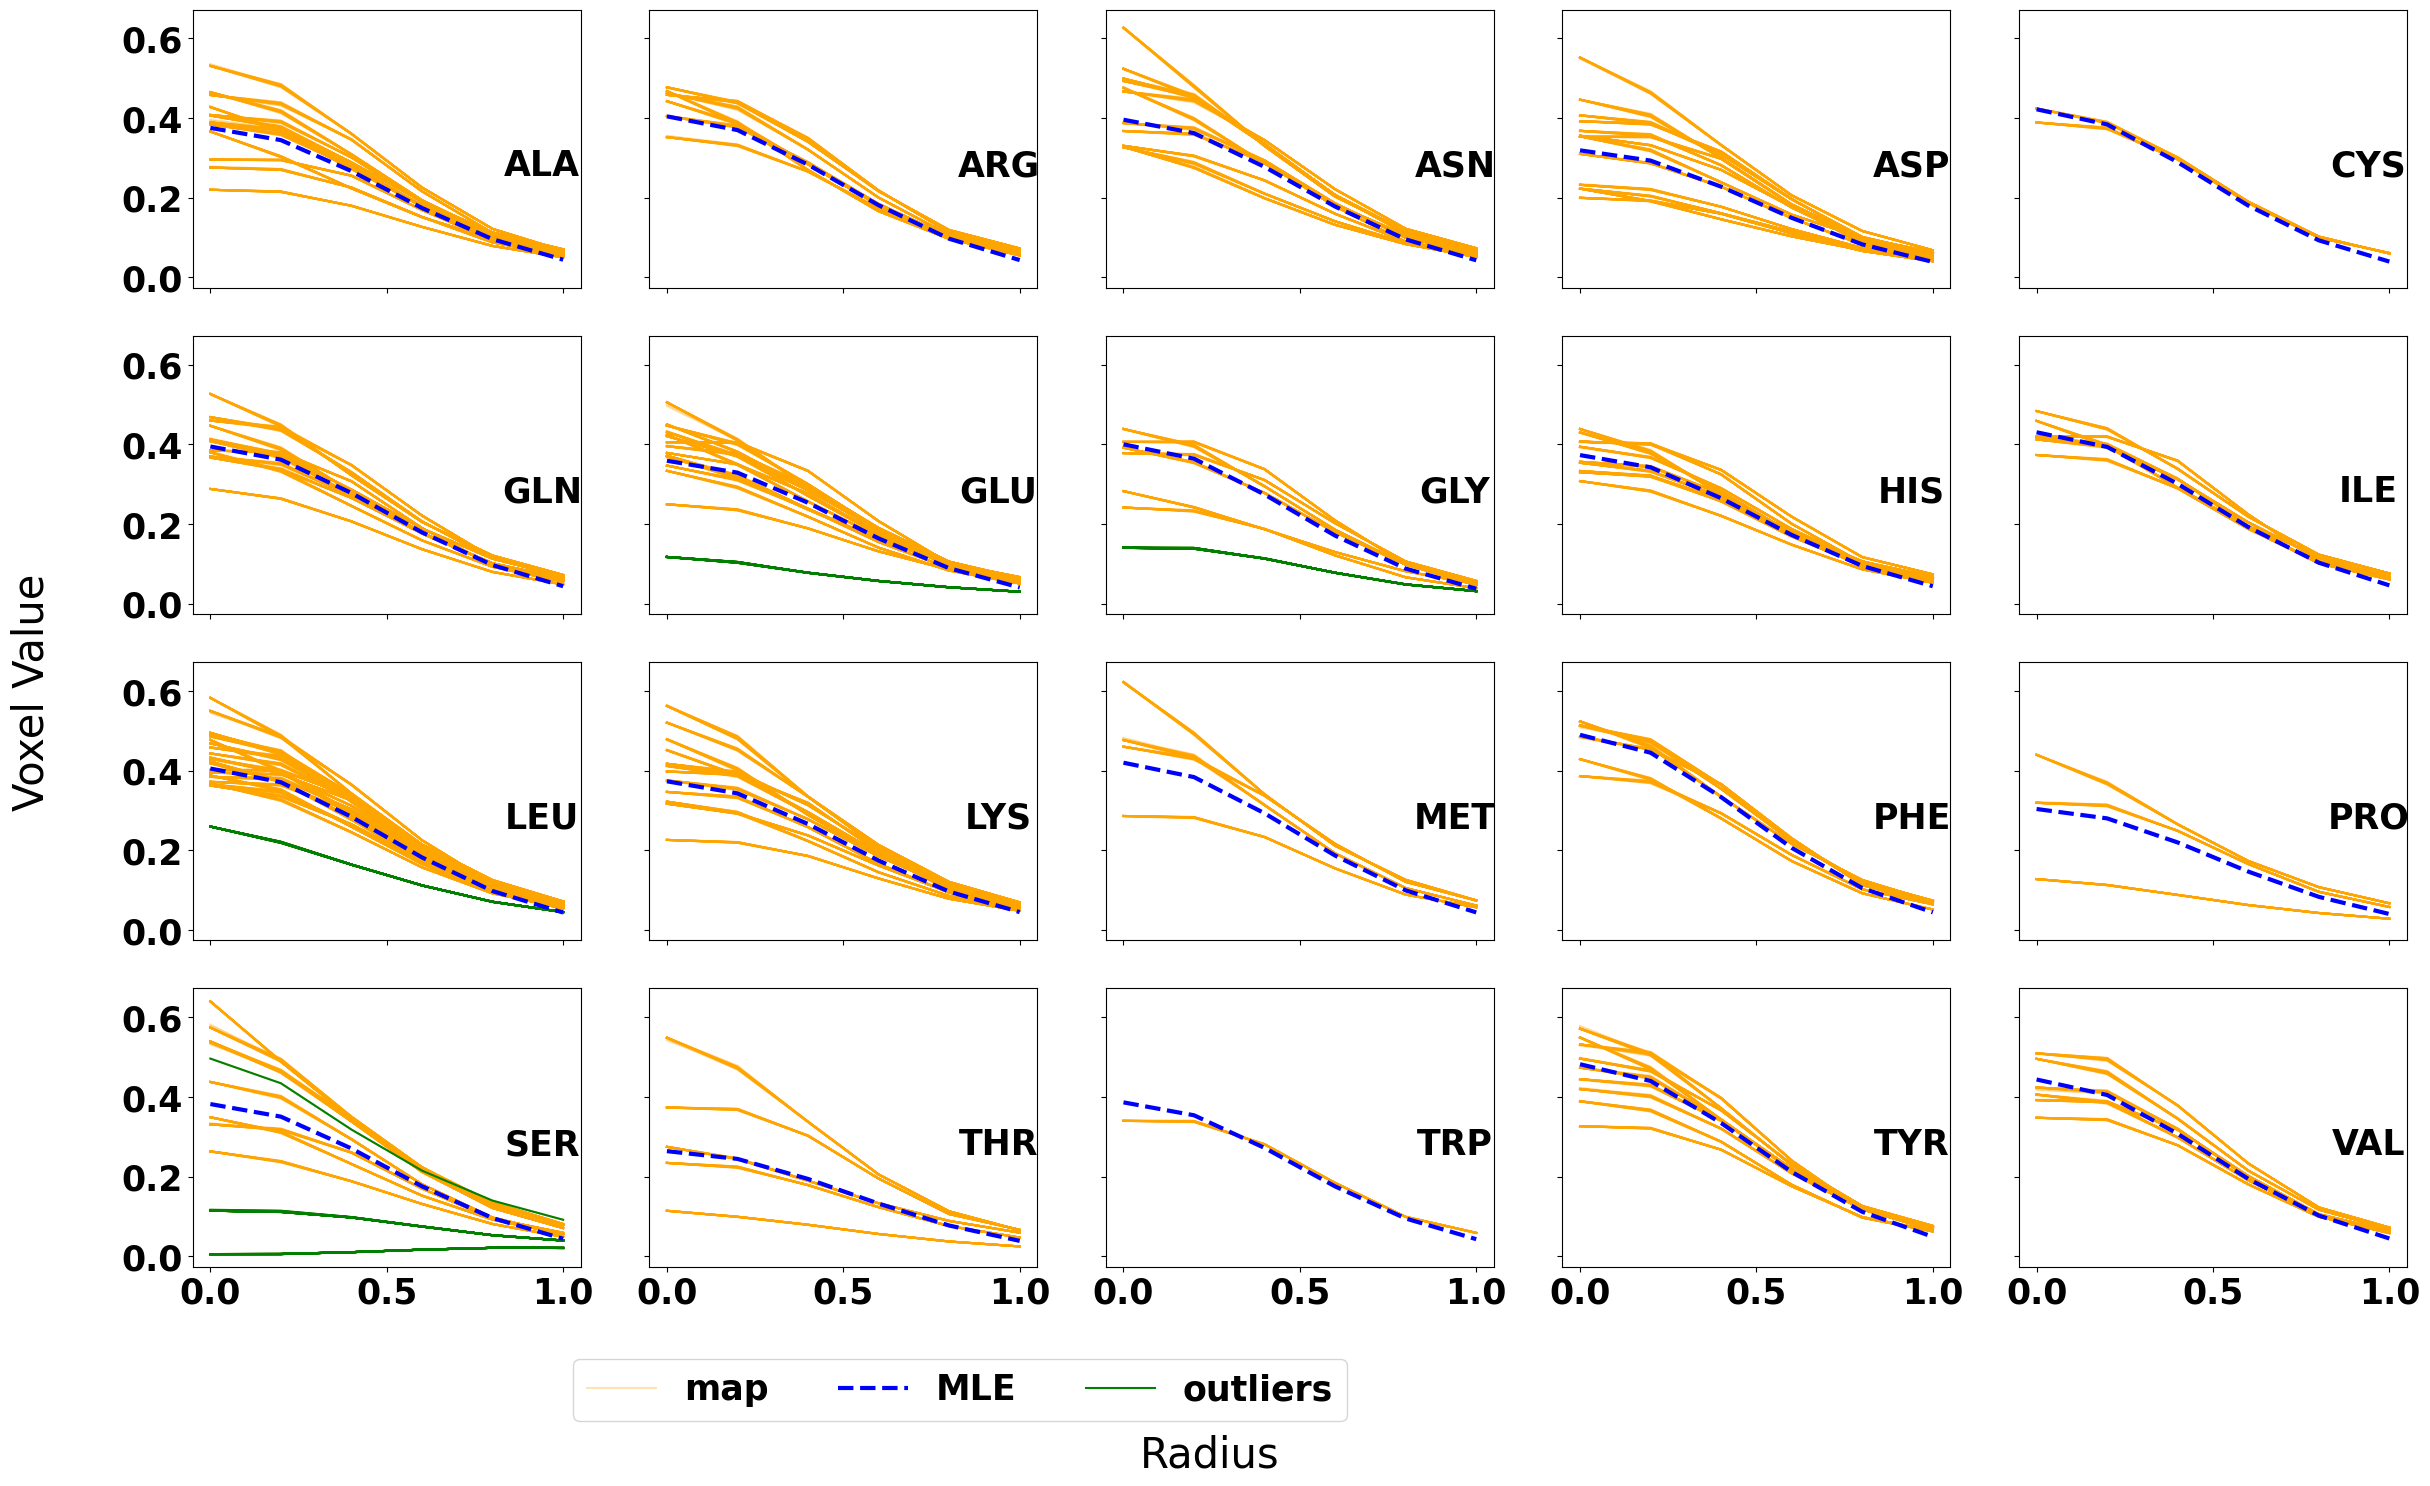

In [11]:
web.outliers_density_plot(f"./figures/outliers_density_plot_{PROTEIN}_{EM_MAP}")